# Import and Clean Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cleaned_data.csv')

In [3]:
df.shape

(5860, 57)

In [4]:
df = df[np.isfinite(df['WS/48'])]
df = df[np.isfinite(df['FG%'])]
df = df[np.isfinite(df['YrsExperience'])]
df.shape

(5827, 57)

# Linear Regression Prediction of Player Efficiency Rating

In [5]:
X = df[['WS/48', 'BPM', 'USG%']]
y = df['PER'].values.reshape(-1, 1)
print(X.shape, y.shape)

(5827, 3) (5827, 1)


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [8]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

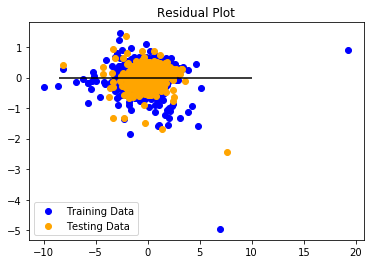

In [10]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.savefig("PER_residuals")
plt.show()

In [11]:
print('Coefficients: \n', X.columns, model.coef_)

Coefficients: 
 Index(['WS/48', 'BPM', 'USG%'], dtype='object') [[ 0.82354336  0.08323487  0.35939676]]


In [12]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.06239664666880236, R2: 0.9286585611993972


# Linear Regression Prediction of Minutes Played

In [13]:
X = df[['GS', 'G', 'PTS']]
y = df['MP'].values.reshape(-1, 1)
print(X.shape, y.shape)

(5827, 3) (5827, 1)


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [15]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

/Users/owen/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [16]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

/Users/owen/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

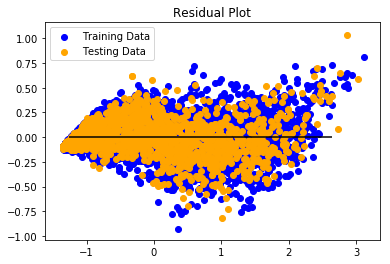

In [18]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.savefig("MP_residuals")
plt.show()

In [19]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.03458932187394327, R2: 0.9649413971201148


# Logistic Regression and Decision Tree/Random Forest of Player Making it Past Rookie Season

In [20]:
df = pd.read_csv('cleaned_data.csv')
df = df[np.isfinite(df['WS/48'])]
df = df[np.isfinite(df['FG%'])]
df = df[np.isfinite(df['YrsExperience'])]
noExp_df = df.loc[(df['YrsExperience'] == 0) & (df['Year'] != 2016)]
noExp_df

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,STL,BLK,TOV,PF,PTS,TrueSalary,YrsExperience,Height,Weight,RoundedPosition
1,2007,Hassan Adams,SG,22,NJN,61,8,495,13.0,0.577,...,17,4,22,47,174,0,0.0,76.0,220.0,2.0
2,2007,Maurice Ager,SG,22,DAL,32,1,214,2.9,0.408,...,4,3,15,27,69,0,0.0,77.0,202.0,2.0
3,2007,LaMarcus Aldridge,C,21,POR,63,22,1392,17.1,0.533,...,22,73,43,186,565,1900000,0.0,83.0,240.0,5.0
8,2007,Lou Amundson,PF,24,TOT,11,0,89,9.6,0.412,...,1,8,5,15,16,0,0.0,0.0,0.0,0.0
10,2007,Lou Amundson,PF,24,PHI,10,0,87,9.8,0.412,...,1,8,5,15,16,0,0.0,0.0,0.0,0.0
18,2007,Hilton Armstrong,C,22,NOK,56,5,634,12.2,0.570,...,12,26,35,79,176,700000,0.0,83.0,235.0,5.0
21,2007,James Augustine,PF,22,ORL,2,0,7,16.6,0.333,...,0,0,0,2,2,0,0.0,82.0,235.0,4.0
22,2007,Kelenna Azubuike,SG,23,GSW,41,9,669,13.4,0.572,...,22,10,39,49,291,700000,0.0,77.0,220.0,2.0
23,2007,Renaldo Balkman,SF,22,NYK,68,1,1064,16.1,0.531,...,57,44,49,146,334,3100000,0.0,80.0,208.0,4.0
26,2007,J.J. Barea,PG,22,DAL,33,1,191,9.6,0.440,...,1,1,14,19,78,0,0.0,0.0,0.0,0.0


In [21]:
noExp = noExp_df['Player']

In [22]:
oneExp_df = df.loc[(df['YrsExperience'] == 1) & (df['Year'] != 2007)]
oneExp_df

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,STL,BLK,TOV,PF,PTS,TrueSalary,YrsExperience,Height,Weight,RoundedPosition
519,2008,Maurice Ager,SG,23,DAL,12,3,77,-4.4,0.253,...,0,1,3,11,15,0,1.0,77.0,202.0,2.0
520,2008,Maurice Ager,SG,23,NJN,14,0,88,7.1,0.443,...,0,0,3,6,36,0,1.0,77.0,202.0,2.0
522,2008,LaMarcus Aldridge,PF,22,POR,76,76,2649,18.5,0.523,...,55,94,126,240,1350,10100000,1.0,83.0,240.0,4.0
541,2008,Hilton Armstrong,C,23,NOH,65,3,732,7.7,0.498,...,15,34,59,130,178,600000,1.0,83.0,235.0,5.0
544,2008,James Augustine,PF,23,ORL,25,0,149,10.8,0.533,...,5,2,6,18,40,900000,1.0,82.0,235.0,4.0
545,2008,Kelenna Azubuike,SG,24,GSW,81,17,1732,13.5,0.534,...,45,34,58,159,692,2200000,1.0,77.0,220.0,3.0
546,2008,Renaldo Balkman,SF,23,NYK,65,0,952,11.5,0.492,...,44,30,37,132,224,800000,1.0,80.0,208.0,3.0
552,2008,Andrea Bargnani,PF,22,TOR,78,53,1861,10.6,0.495,...,23,37,88,211,792,1300000,1.0,84.0,225.0,4.0
574,2008,Josh Boone,PF,23,NJN,70,53,1773,14.8,0.543,...,36,61,68,155,575,2000000,1.0,82.0,237.0,5.0
583,2008,Ronnie Brewer,SG,22,UTA,76,76,2088,18.4,0.612,...,129,19,69,110,914,15900000,1.0,79.0,220.0,3.0


In [23]:
oneExp = oneExp_df['Player']

In [24]:
playersNone = []
for player in noExp:
    playersNone.append(player)

In [25]:
playersOne = []
for player in oneExp:
    playersOne.append(player)

In [26]:
twoYrs = []
for player in playersNone:
    if player in playersOne:
        value = 1
        twoYrs.append(value)
    else:
        value = 0
        twoYrs.append(value)

In [27]:
len(twoYrs)

1285

In [28]:
noExp_df['atLeast2Years'] = twoYrs

/Users/owen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
noExp_df.head(20)

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,BLK,TOV,PF,PTS,TrueSalary,YrsExperience,Height,Weight,RoundedPosition,atLeast2Years
1,2007,Hassan Adams,SG,22,NJN,61,8,495,13.0,0.577,...,4,22,47,174,0,0.0,76.0,220.0,2.0,1
2,2007,Maurice Ager,SG,22,DAL,32,1,214,2.9,0.408,...,3,15,27,69,0,0.0,77.0,202.0,2.0,1
3,2007,LaMarcus Aldridge,C,21,POR,63,22,1392,17.1,0.533,...,73,43,186,565,1900000,0.0,83.0,240.0,5.0,1
8,2007,Lou Amundson,PF,24,TOT,11,0,89,9.6,0.412,...,8,5,15,16,0,0.0,0.0,0.0,0.0,0
10,2007,Lou Amundson,PF,24,PHI,10,0,87,9.8,0.412,...,8,5,15,16,0,0.0,0.0,0.0,0.0,0
18,2007,Hilton Armstrong,C,22,NOK,56,5,634,12.2,0.570,...,26,35,79,176,700000,0.0,83.0,235.0,5.0,1
21,2007,James Augustine,PF,22,ORL,2,0,7,16.6,0.333,...,0,0,2,2,0,0.0,82.0,235.0,4.0,1
22,2007,Kelenna Azubuike,SG,23,GSW,41,9,669,13.4,0.572,...,10,39,49,291,700000,0.0,77.0,220.0,2.0,1
23,2007,Renaldo Balkman,SF,22,NYK,68,1,1064,16.1,0.531,...,44,49,146,334,3100000,0.0,80.0,208.0,4.0,1
26,2007,J.J. Barea,PG,22,DAL,33,1,191,9.6,0.440,...,1,14,19,78,0,0.0,0.0,0.0,0.0,0


In [30]:
noExp_df.keys()

Index(['Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2', 'OBPM', 'DBPM',
       'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'TrueSalary', 'YrsExperience', 'Height',
       'Weight', 'RoundedPosition', 'atLeast2Years'],
      dtype='object')

In [31]:
noExp_df = noExp_df.drop("blanl", axis=1)
noExp_df = noExp_df.drop("blank2", axis=1)
noExp_df = noExp_df.dropna(axis=0, how='any')
noExp_df = noExp_df.reset_index(drop=True) #RESET INDEX
data = noExp_df.drop("Pos", axis=1)
data = data.drop("Tm", axis=1)
data = data.drop("Player", axis=1)
data = data.drop("TrueSalary", axis=1)
data = data.drop("RoundedPosition", axis=1)
data = data.drop("Year", axis=1)
data = data.drop("Age", axis=1)
data = data.drop("atLeast2Years", axis=1)
feature_names = data.columns
target = noExp_df['atLeast2Years']
data.head()

,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,...,TRB,AST,STL,BLK,TOV,PF,PTS,YrsExperience,Height,Weight
0,61,8,495,13.0,0.577,0.007,0.267,8.4,9.9,9.2,...,77,13,17,4,22,47,174,0.0,76.0,220.0
1,32,1,214,2.9,0.408,0.214,0.471,0.6,11.0,5.9,...,21,7,4,3,15,27,69,0.0,77.0,202.0
2,63,22,1392,17.1,0.533,0.004,0.240,12.6,15.3,13.9,...,312,24,22,73,43,186,565,0.0,83.0,240.0
3,41,9,669,13.4,0.572,0.359,0.355,4.2,11.4,7.7,...,94,28,22,10,39,49,291,0.0,77.0,220.0
4,68,1,1064,16.1,0.531,0.098,0.327,11.0,21.8,16.4,...,294,44,57,44,49,146,334,0.0,80.0,208.0


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=1, stratify=target)

In [33]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

/Users/owen/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/Users/owen/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [34]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

/Users/owen/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/Users/owen/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/owen/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [35]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
classifier.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [37]:
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Testing Data Score: 0.6825396825396826


In [38]:
predictions = classifier.predict(X_test_scaled)
predict_df = pd.DataFrame({"Prediction": predictions, "Actual": y_test})
wrong_predict_df = predict_df.loc[predict_df['Actual'] != predict_df['Prediction']]
wrong_predict_df

,Actual,Prediction
840,0,1
844,1,0
573,0,1
252,1,0
873,1,0
604,1,0
270,1,0
803,1,0
773,0,1
843,0,1


In [39]:
predictions.shape

(252,)

In [40]:
from sklearn import tree

In [41]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [42]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.66269841269841268

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.71031746031746035

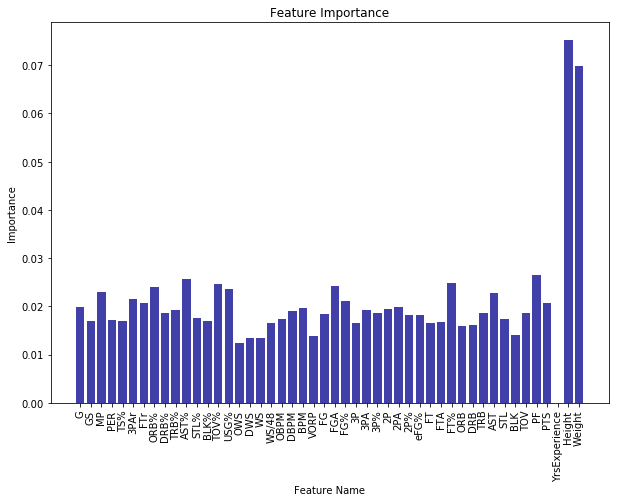

In [44]:
x_values = np.arange(len(feature_names))
plt.figure(figsize=(10, 7))

plt.title("Feature Importance")
plt.xlabel("Feature Name")
plt.ylabel("Importance")

plt.bar(x_values, rf.feature_importances_, facecolor="darkblue",
        alpha=0.75, tick_label=feature_names)
plt.xticks(rotation='vertical')
plt.savefig("Rookie_Success_Features")
plt.show()

In [45]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.075152608744654015, 'Height'),
 (0.069883396659754335, 'Weight'),
 (0.026488521679936251, 'PF'),
 (0.025698973690711075, 'AST%'),
 (0.02488346829653814, 'FT%'),
 (0.024731650249501816, 'TOV%'),
 (0.024301115520531175, 'FGA'),
 (0.024044133392321997, 'ORB%'),
 (0.02361740750641269, 'USG%'),
 (0.022971425629124177, 'MP'),
 (0.022714711889988758, 'AST'),
 (0.021547826472185245, '3PAr'),
 (0.021020578835880238, 'FG%'),
 (0.020729236376700443, 'PTS'),
 (0.020613571024550411, 'FTr'),
 (0.01993722061840918, '2PA'),
 (0.019890338063268301, 'G'),
 (0.019704224240095315, 'BPM'),
 (0.019457247820126197, '2P'),
 (0.019330859070126584, '3PA'),
 (0.019144902418677102, 'TRB%'),
 (0.018944554817061712, 'DBPM'),
 (0.018715617984140315, 'TOV'),
 (0.018691143083961758, '3P%'),
 (0.018617382036708058, 'TRB'),
 (0.018575658922057845, 'DRB%'),
 (0.018391980378108564, 'FG'),
 (0.018199253722741823, '2P%'),
 (0.018166851799685545, 'eFG%'),
 (0.017549285828189917, 'STL%'),
 (0.017474978846344129, 'STL'),
 

# K Nearest Neighbors Player Position

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
#df['Pos'].value_counts()

In [48]:
df = df.reset_index(drop=True)

In [49]:
#df.index[df['Pos'] == 'C-SF'].tolist()

In [50]:
df = df.drop(df.index[[df.index[df['Pos'] == 'C-SF'].tolist()]])

In [51]:
df = df.reset_index(drop=True)

In [52]:
#df.index[df['Pos'] == 'C-SF'].tolist()

In [53]:
#df['Pos'].value_counts()

In [54]:
df = df.drop("blanl", axis=1)
df = df.drop("blank2", axis=1)
df = df.dropna(axis=0, how='any')

In [55]:
data = df.drop("Pos", axis=1)
data = data.drop("Tm", axis=1)
data = data.drop("Player", axis=1)
data = data.drop("TrueSalary", axis=1)
data = data.drop("RoundedPosition", axis=1)
data = data.drop("Year", axis=1)
data = data.drop("Age", axis=1)
feature_names = data.columns
target = df['Pos']
target_names = target.value_counts().keys().tolist()
data.head()

,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,...,TRB,AST,STL,BLK,TOV,PF,PTS,YrsExperience,Height,Weight
0,80,45,2015,13.1,0.524,0.031,0.358,7.0,16.4,11.6,...,398,109,53,40,116,243,793,10.0,81.0,225.0
1,61,8,495,13.0,0.577,0.007,0.267,8.4,9.9,9.2,...,77,13,17,4,22,47,174,0.0,76.0,220.0
2,32,1,214,2.9,0.408,0.214,0.471,0.6,11.0,5.9,...,21,7,4,3,15,27,69,0.0,77.0,202.0
3,63,22,1392,17.1,0.533,0.004,0.240,12.6,15.3,13.9,...,312,24,22,73,43,186,565,0.0,83.0,240.0
4,60,1,638,10.4,0.443,0.004,0.132,7.6,13.7,10.6,...,119,16,17,16,21,85,242,5.0,82.0,255.0


In [56]:
#data.shape

In [57]:
#target.shape

In [58]:
#data.keys()

In [59]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

k: 1, Train/Test Score: 1.000/0.552
k: 3, Train/Test Score: 0.758/0.554
k: 5, Train/Test Score: 0.719/0.571
k: 7, Train/Test Score: 0.688/0.575
k: 9, Train/Test Score: 0.668/0.586
k: 11, Train/Test Score: 0.654/0.579
k: 13, Train/Test Score: 0.652/0.578
k: 15, Train/Test Score: 0.648/0.578
k: 17, Train/Test Score: 0.643/0.573
k: 19, Train/Test Score: 0.634/0.579
k: 21, Train/Test Score: 0.629/0.587
k: 23, Train/Test Score: 0.624/0.578
k: 25, Train/Test Score: 0.633/0.572
k: 27, Train/Test Score: 0.626/0.560
k: 29, Train/Test Score: 0.623/0.550
k: 31, Train/Test Score: 0.616/0.566
k: 33, Train/Test Score: 0.616/0.569
k: 35, Train/Test Score: 0.616/0.565
k: 37, Train/Test Score: 0.615/0.561
k: 39, Train/Test Score: 0.609/0.567
k: 41, Train/Test Score: 0.609/0.554
k: 43, Train/Test Score: 0.608/0.563
k: 45, Train/Test Score: 0.607/0.559
k: 47, Train/Test Score: 0.600/0.557
k: 49, Train/Test Score: 0.604/0.562
k: 51, Train/Test Score: 0.594/0.558
k: 53, Train/Test Score: 0.592/0.562
k: 55,

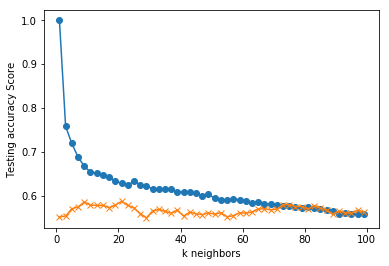

In [60]:
train_scores = []
test_scores = []
for k in range(1, 100, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 100, 2), train_scores, marker='o')
plt.plot(range(1, 100, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.savefig("KNN_Pos")
plt.show()

In [61]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
print('k=15 Test Acc: %.3f' % knn.score(X_test, y_test))

k=15 Test Acc: 0.578


# Stratified KNN Player Position

In [62]:
#target.value_counts()

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42, stratify=target)

In [64]:
#X_train.values.reshape(-1,1)

In [65]:
X_scaler = StandardScaler().fit(X_train.values.reshape(-1, 1))

In [66]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.549
k: 3, Train/Test Score: 0.761/0.551
k: 5, Train/Test Score: 0.723/0.552
k: 7, Train/Test Score: 0.696/0.577
k: 9, Train/Test Score: 0.674/0.572
k: 11, Train/Test Score: 0.665/0.578
k: 13, Train/Test Score: 0.658/0.557
k: 15, Train/Test Score: 0.654/0.564
k: 17, Train/Test Score: 0.645/0.569
k: 19, Train/Test Score: 0.645/0.567
k: 21, Train/Test Score: 0.634/0.574
k: 23, Train/Test Score: 0.634/0.582
k: 25, Train/Test Score: 0.628/0.577
k: 27, Train/Test Score: 0.623/0.567
k: 29, Train/Test Score: 0.624/0.572
k: 31, Train/Test Score: 0.619/0.575
k: 33, Train/Test Score: 0.616/0.573
k: 35, Train/Test Score: 0.612/0.570
k: 37, Train/Test Score: 0.607/0.567
k: 39, Train/Test Score: 0.604/0.564
k: 41, Train/Test Score: 0.607/0.560
k: 43, Train/Test Score: 0.603/0.562
k: 45, Train/Test Score: 0.600/0.566
k: 47, Train/Test Score: 0.602/0.563
k: 49, Train/Test Score: 0.598/0.560
k: 51, Train/Test Score: 0.594/0.569
k: 53, Train/Test Score: 0.595/0.556
k: 55,

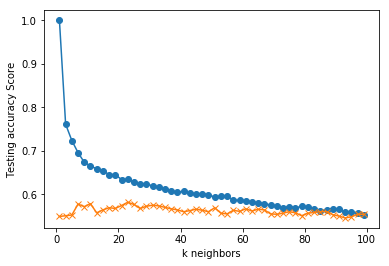

In [67]:
train_scores = []
test_scores = []
for k in range(1, 100, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 100, 2), train_scores, marker='o')
plt.plot(range(1, 100, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.savefig("Strat_KNN_Pos")
plt.show()

In [68]:
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train_scaled, y_train)
print('k=23 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=23 Test Acc: 0.582


# Random Forests Player Position

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(data, target)
rf.score(data, target)

1.0

In [71]:
importances = rf.feature_importances_
importances

array([ 0.00977871,  0.00996585,  0.01026925,  0.01230737,  0.01124941,
        0.0328304 ,  0.01463634,  0.03981186,  0.04416608,  0.06398924,
        0.08332225,  0.01541429,  0.0305443 ,  0.02809005,  0.01641054,
        0.00928723,  0.0080193 ,  0.00885299,  0.01134483,  0.01104692,
        0.01569745,  0.01092908,  0.00857452,  0.01010244,  0.01064966,
        0.01342347,  0.01619394,  0.02018677,  0.01440664,  0.0102102 ,
        0.01087128,  0.01277114,  0.01229222,  0.01103529,  0.01095674,
        0.01400312,  0.01979354,  0.0126178 ,  0.01446007,  0.0225568 ,
        0.01172941,  0.01982305,  0.0117766 ,  0.01184103,  0.01028731,
        0.0109763 ,  0.11766798,  0.06282897])

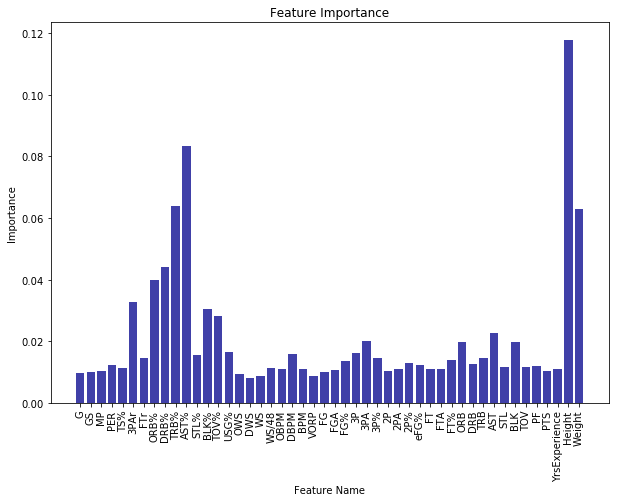

In [72]:
x_values = np.arange(len(feature_names))
plt.figure(figsize=(10, 7))

plt.title("Feature Importance")
plt.xlabel("Feature Name")
plt.ylabel("Importance")

plt.bar(x_values, rf.feature_importances_, facecolor="darkblue",
        alpha=0.75, tick_label=feature_names)
plt.xticks(rotation='vertical')
#plt.savefig("Pos_Features")
plt.show()

In [73]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.11766798032406654, 'Height'),
 (0.083322252424931062, 'AST%'),
 (0.06398924081753124, 'TRB%'),
 (0.062828967486726353, 'Weight'),
 (0.044166075539371956, 'DRB%'),
 (0.039811861088318801, 'ORB%'),
 (0.032830398978888974, '3PAr'),
 (0.030544295008781294, 'BLK%'),
 (0.028090048750993368, 'TOV%'),
 (0.022556802441257857, 'AST'),
 (0.020186770630671237, '3PA'),
 (0.01982305093858382, 'BLK'),
 (0.019793538999598213, 'ORB'),
 (0.016410535805430698, 'USG%'),
 (0.016193935261861782, '3P'),
 (0.015697446024742066, 'DBPM'),
 (0.015414287665826889, 'STL%'),
 (0.014636343642793884, 'FTr'),
 (0.014460068387705418, 'TRB'),
 (0.014406640224607168, '3P%'),
 (0.014003123241981158, 'FT%'),
 (0.013423468361328201, 'FG%'),
 (0.012771135761731132, '2P%'),
 (0.012617797224290038, 'DRB'),
 (0.012307374029378084, 'PER'),
 (0.012292219881494386, 'eFG%'),
 (0.011841025539152733, 'PF'),
 (0.011776596046097605, 'TOV'),
 (0.011729406088459435, 'STL'),
 (0.011344833128132821, 'WS/48'),
 (0.011249414832510282, 'T

# Decision Tree and Random Forests Player Position

In [74]:
from sklearn import tree

In [75]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [76]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.64351464435146444

In [77]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.75648535564853558

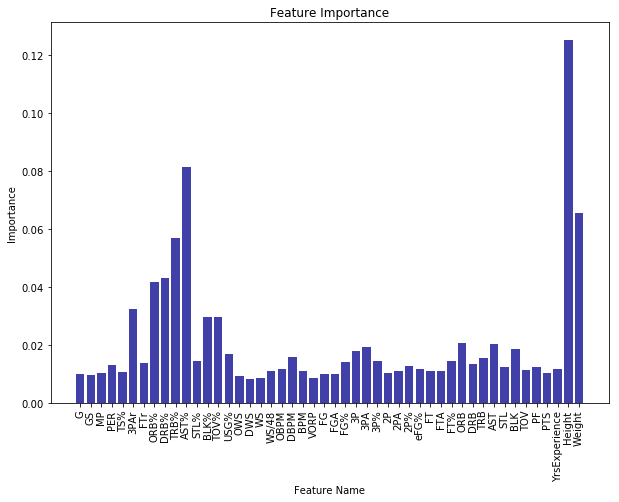

In [78]:
x_values = np.arange(len(feature_names))
plt.figure(figsize=(10, 7))

plt.title("Feature Importance")
plt.xlabel("Feature Name")
plt.ylabel("Importance")

plt.bar(x_values, rf.feature_importances_, facecolor="darkblue",
        alpha=0.75, tick_label=feature_names)
plt.xticks(rotation='vertical')
plt.savefig("Pos_Features")
plt.show()

In [79]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.12501019271822528, 'Height'),
 (0.081243281482591176, 'AST%'),
 (0.065598013998400428, 'Weight'),
 (0.056736973891003482, 'TRB%'),
 (0.043207421787521766, 'DRB%'),
 (0.041616643889109524, 'ORB%'),
 (0.032244545986514848, '3PAr'),
 (0.029723697678943731, 'BLK%'),
 (0.029525982557297277, 'TOV%'),
 (0.020794755783028841, 'ORB'),
 (0.020263161030436259, 'AST'),
 (0.019250718034523173, '3PA'),
 (0.018388248560068335, 'BLK'),
 (0.017848156889559531, '3P'),
 (0.016718467871265894, 'USG%'),
 (0.015680138105132465, 'DBPM'),
 (0.015306124466946293, 'TRB'),
 (0.014563006405300661, 'FT%'),
 (0.014465539254045786, 'STL%'),
 (0.01435383556435196, '3P%'),
 (0.014133054865299506, 'FG%'),
 (0.013677233121097244, 'FTr'),
 (0.013499370566902782, 'DRB'),
 (0.012939894017197869, 'PER'),
 (0.012817416258452372, '2P%'),
 (0.012429879941276306, 'STL'),
 (0.012310611142148813, 'PF'),
 (0.011727409209371795, 'YrsExperience'),
 (0.011540945242461005, 'eFG%'),
 (0.011523269066015614, 'OBPM'),
 (0.011356308602

# Team Classification

In [80]:
df = pd.read_csv('cleaned_data.csv')
df.shape

(5860, 57)

In [81]:
df = df[np.isfinite(df['WS/48'])]
df = df[np.isfinite(df['FG%'])]
df = df[np.isfinite(df['YrsExperience'])]
df.shape

(5827, 57)

In [82]:
df = df.reset_index(drop=True)

In [83]:
df = df.drop("blanl", axis=1)
df = df.drop("blank2", axis=1)
df = df.dropna(axis=0, how='any')

In [84]:
df.shape

(4780, 55)

In [85]:
data = df.drop("Pos", axis=1)
data = data.drop("Tm", axis=1)
data = data.drop("Player", axis=1)
data = data.drop("TrueSalary", axis=1)
#data = data.drop("RoundedPosition", axis=1)
#data = data.drop("Year", axis=1)
data = data.drop("Age", axis=1)
feature_names = data.columns
target = df['Tm']
target_names = target.value_counts().keys().tolist()
data.head()

,Year,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,...,AST,STL,BLK,TOV,PF,PTS,YrsExperience,Height,Weight,RoundedPosition
0,2007,80,45,2015,13.1,0.524,0.031,0.358,7.0,16.4,...,109,53,40,116,243,793,10.0,81.0,225.0,4.0
1,2007,61,8,495,13.0,0.577,0.007,0.267,8.4,9.9,...,13,17,4,22,47,174,0.0,76.0,220.0,2.0
2,2007,32,1,214,2.9,0.408,0.214,0.471,0.6,11.0,...,7,4,3,15,27,69,0.0,77.0,202.0,2.0
3,2007,63,22,1392,17.1,0.533,0.004,0.240,12.6,15.3,...,24,22,73,43,186,565,0.0,83.0,240.0,5.0
4,2007,60,1,638,10.4,0.443,0.004,0.132,7.6,13.7,...,16,17,16,21,85,242,5.0,82.0,255.0,4.0


In [86]:
data.shape

(4780, 50)

In [87]:
target.shape

(4780,)

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42, stratify=target)

In [89]:
X_scaler = StandardScaler().fit(X_train.values.reshape(-1, 1))

In [90]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.160
k: 3, Train/Test Score: 0.447/0.151
k: 5, Train/Test Score: 0.365/0.156
k: 7, Train/Test Score: 0.332/0.159
k: 9, Train/Test Score: 0.317/0.156
k: 11, Train/Test Score: 0.303/0.157
k: 13, Train/Test Score: 0.282/0.154
k: 15, Train/Test Score: 0.267/0.158
k: 17, Train/Test Score: 0.259/0.149
k: 19, Train/Test Score: 0.249/0.150
k: 21, Train/Test Score: 0.245/0.147
k: 23, Train/Test Score: 0.243/0.147
k: 25, Train/Test Score: 0.238/0.145
k: 27, Train/Test Score: 0.231/0.144
k: 29, Train/Test Score: 0.227/0.146
k: 31, Train/Test Score: 0.225/0.146
k: 33, Train/Test Score: 0.221/0.148
k: 35, Train/Test Score: 0.218/0.149
k: 37, Train/Test Score: 0.213/0.151
k: 39, Train/Test Score: 0.208/0.150
k: 41, Train/Test Score: 0.205/0.150
k: 43, Train/Test Score: 0.203/0.154
k: 45, Train/Test Score: 0.207/0.158
k: 47, Train/Test Score: 0.203/0.156
k: 49, Train/Test Score: 0.207/0.149
k: 51, Train/Test Score: 0.205/0.148
k: 53, Train/Test Score: 0.201/0.147
k: 55,

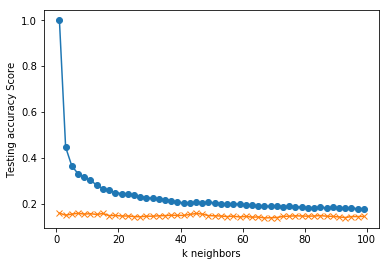

In [91]:
train_scores = []
test_scores = []
for k in range(1, 100, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 100, 2), train_scores, marker='o')
plt.plot(range(1, 100, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.savefig("Strat_KNN_Tm")
plt.show()

In [92]:
from sklearn import tree

In [93]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [94]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.17238493723849371

In [95]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.2878661087866109

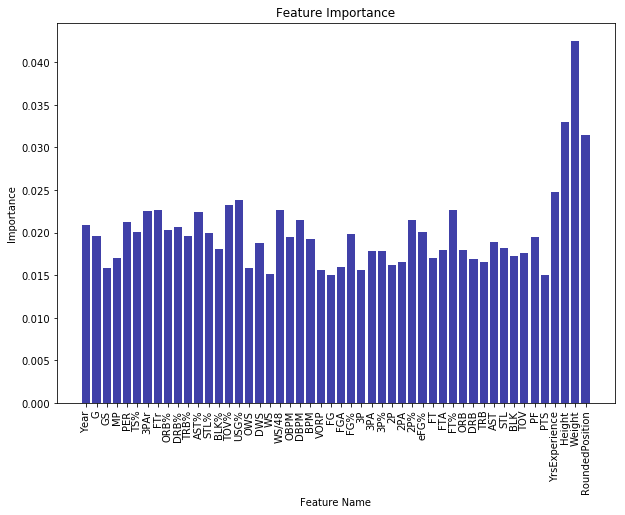

In [96]:
x_values = np.arange(len(feature_names))
plt.figure(figsize=(10, 7))

plt.title("Feature Importance")
plt.xlabel("Feature Name")
plt.ylabel("Importance")

plt.bar(x_values, rf.feature_importances_, facecolor="darkblue",
        alpha=0.75, tick_label=feature_names)
plt.xticks(rotation='vertical')
plt.savefig("Tm_Features")
plt.show()

In [97]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.042542162671887394, 'Weight'),
 (0.032955542028393611, 'Height'),
 (0.031497090449764162, 'RoundedPosition'),
 (0.024748381286173241, 'YrsExperience'),
 (0.023788642297143153, 'USG%'),
 (0.023256301336335446, 'TOV%'),
 (0.022698437206500378, 'FTr'),
 (0.022633190412307033, 'FT%'),
 (0.022632701008328513, 'WS/48'),
 (0.022555006799192596, '3PAr'),
 (0.022428904004178869, 'AST%'),
 (0.021478071541036332, 'DBPM'),
 (0.021460261836495579, '2P%'),
 (0.021299265434003622, 'PER'),
 (0.020909097574842085, 'Year'),
 (0.020637386549464138, 'DRB%'),
 (0.020260870979442687, 'ORB%'),
 (0.02012708591013412, 'TS%'),
 (0.020031610485995732, 'eFG%'),
 (0.019905576988071928, 'STL%'),
 (0.019787999276859185, 'FG%'),
 (0.019619304557654271, 'G'),
 (0.019611853540275614, 'TRB%'),
 (0.019539809449868158, 'OBPM'),
 (0.019485619968579872, 'PF'),
 (0.019234950314144326, 'BPM'),
 (0.018881470514474818, 'AST'),
 (0.018810350104245921, 'DWS'),
 (0.018150401190354742, 'STL'),
 (0.018073585290599371, 'BLK%'),
 

# Combining With DPOY Data

In [98]:
season_stats = pd.read_csv('cleaned_data.csv')

In [99]:
season_stats.columns

Index(['Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2', 'OBPM', 'DBPM',
       'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'TrueSalary', 'YrsExperience', 'Height',
       'Weight', 'RoundedPosition'],
      dtype='object')

In [100]:
dpoy_2016 = season_stats.loc[(season_stats['Year'] == 2016.0) & (season_stats['Player'] == 'Kawhi Leonard')]
dpoy_2015 = season_stats.loc[(season_stats['Year'] == 2015.0) & (season_stats['Player'] == 'Kawhi Leonard')]
dpoy_2014 = season_stats.loc[(season_stats['Year'] == 2014.0) & (season_stats['Player'] == 'Joakim Noah')]
dpoy_2013 = season_stats.loc[(season_stats['Year'] == 2013.0) & (season_stats['Player'] == 'Marc Gasol')]
dpoy_2012 = season_stats.loc[(season_stats['Year'] == 2012.0) & (season_stats['Player'] == 'Tyson Chandler')]
dpoy_2011 = season_stats.loc[(season_stats['Year'] == 2011.0) & (season_stats['Player'] == 'Dwight Howard')]
dpoy_2010 = season_stats.loc[(season_stats['Year'] == 2010.0) & (season_stats['Player'] == 'Dwight Howard')]
dpoy_2009 = season_stats.loc[(season_stats['Year'] == 2009.0) & (season_stats['Player'] == 'Dwight Howard')]
dpoy_2008 = season_stats.loc[(season_stats['Year'] == 2008.0) & (season_stats['Player'] == 'Kevin Garnett')]
dpoy_2007 = season_stats.loc[(season_stats['Year'] == 2007.0) & (season_stats['Player'] == 'Marcus Camby')]

dpoys = [dpoy_2007, dpoy_2008, dpoy_2009, dpoy_2010, dpoy_2011, dpoy_2012, dpoy_2013, dpoy_2014, dpoy_2015, dpoy_2016]

dpoys_df = pd.concat(dpoys)
dpoys_df

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,STL,BLK,TOV,PF,PTS,TrueSalary,YrsExperience,Height,Weight,RoundedPosition
77,2007,Marcus Camby,C,32,DEN,70,70,2369,19.1,0.519,...,87,231,122,183,785,19300000,10.0,83.0,220.0,5.0
696,2008,Kevin Garnett,PF,31,BOS,71,71,2328,25.3,0.588,...,100,89,138,163,1337,24200000,12.0,83.0,220.0,4.0
1360,2009,Dwight Howard,C,23,ORL,79,79,2821,25.4,0.600,...,77,231,240,270,1624,19800000,4.0,83.0,240.0,5.0
1938,2010,Dwight Howard,C,24,ORL,82,82,2843,24.0,0.630,...,75,228,274,287,1503,21900000,5.0,83.0,240.0,5.0
2565,2011,Dwight Howard,C,25,ORL,78,78,2935,26.1,0.616,...,107,186,279,258,1784,20900000,6.0,83.0,240.0,5.0
2987,2012,Tyson Chandler,C,29,NYK,62,62,2061,18.7,0.708,...,56,89,102,186,699,17100000,10.0,85.0,235.0,5.0
3623,2013,Marc Gasol,C,28,MEM,80,80,2796,19.5,0.559,...,80,139,157,255,1127,22100000,4.0,85.0,265.0,5.0
4442,2014,Joakim Noah,C,28,CHI,80,80,2820,20.0,0.531,...,99,121,194,245,1007,22400000,6.0,83.0,232.0,4.0
4978,2015,Kawhi Leonard,SF,23,SAS,64,64,2033,22.0,0.567,...,148,48,97,128,1057,21600000,3.0,79.0,230.0,3.0
5604,2016,Kawhi Leonard,SF,24,SAS,72,72,2380,26.0,0.616,...,128,71,105,133,1523,11300000,4.0,79.0,230.0,3.0


In [101]:
df = season_stats
df.columns

Index(['Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2', 'OBPM', 'DBPM',
       'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'TrueSalary', 'YrsExperience', 'Height',
       'Weight', 'RoundedPosition'],
      dtype='object')

In [102]:
dpoys_index = dpoys_df.index.values.tolist()
dpoys_index

[77, 696, 1360, 1938, 2565, 2987, 3623, 4442, 4978, 5604]

In [103]:
dpoy = []
for i in range(0, len(df)):
    if i in dpoys_index:
        value = 1
        dpoy.append(value)
    else:
        value = 0
        dpoy.append(value)
            

In [104]:
len(dpoy)

5860

In [105]:
sum = 0
for i in range(0, len(dpoy)):
    sum = sum + dpoy[i]
print(sum)

10


In [106]:
df['dpoy'] = dpoy

In [107]:
df.shape

(5860, 58)

In [108]:
df.keys()

Index(['Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2', 'OBPM', 'DBPM',
       'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'TrueSalary', 'YrsExperience', 'Height',
       'Weight', 'RoundedPosition', 'dpoy'],
      dtype='object')

In [109]:
df.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,BLK,TOV,PF,PTS,TrueSalary,YrsExperience,Height,Weight,RoundedPosition,dpoy
0,2007,Shareef Abdur-Rahim,C,30,SAC,80,45,2015,13.1,0.524,...,40,116,243,793,1800000,10.0,81.0,225.0,4.0,0
1,2007,Hassan Adams,SG,22,NJN,61,8,495,13.0,0.577,...,4,22,47,174,0,0.0,76.0,220.0,2.0,0
2,2007,Maurice Ager,SG,22,DAL,32,1,214,2.9,0.408,...,3,15,27,69,0,0.0,77.0,202.0,2.0,0
3,2007,LaMarcus Aldridge,C,21,POR,63,22,1392,17.1,0.533,...,73,43,186,565,1900000,0.0,83.0,240.0,5.0,0
4,2007,Malik Allen,PF,28,CHI,60,1,638,10.4,0.443,...,16,21,85,242,0,5.0,82.0,255.0,4.0,0


In [110]:
df.loc[df['dpoy'] == 1]

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,BLK,TOV,PF,PTS,TrueSalary,YrsExperience,Height,Weight,RoundedPosition,dpoy
77,2007,Marcus Camby,C,32,DEN,70,70,2369,19.1,0.519,...,231,122,183,785,19300000,10.0,83.0,220.0,5.0,1
696,2008,Kevin Garnett,PF,31,BOS,71,71,2328,25.3,0.588,...,89,138,163,1337,24200000,12.0,83.0,220.0,4.0,1
1360,2009,Dwight Howard,C,23,ORL,79,79,2821,25.4,0.600,...,231,240,270,1624,19800000,4.0,83.0,240.0,5.0,1
1938,2010,Dwight Howard,C,24,ORL,82,82,2843,24.0,0.630,...,228,274,287,1503,21900000,5.0,83.0,240.0,5.0,1
2565,2011,Dwight Howard,C,25,ORL,78,78,2935,26.1,0.616,...,186,279,258,1784,20900000,6.0,83.0,240.0,5.0,1
2987,2012,Tyson Chandler,C,29,NYK,62,62,2061,18.7,0.708,...,89,102,186,699,17100000,10.0,85.0,235.0,5.0,1
3623,2013,Marc Gasol,C,28,MEM,80,80,2796,19.5,0.559,...,139,157,255,1127,22100000,4.0,85.0,265.0,5.0,1
4442,2014,Joakim Noah,C,28,CHI,80,80,2820,20.0,0.531,...,121,194,245,1007,22400000,6.0,83.0,232.0,4.0,1
4978,2015,Kawhi Leonard,SF,23,SAS,64,64,2033,22.0,0.567,...,48,97,128,1057,21600000,3.0,79.0,230.0,3.0,1
5604,2016,Kawhi Leonard,SF,24,SAS,72,72,2380,26.0,0.616,...,71,105,133,1523,11300000,4.0,79.0,230.0,3.0,1


# Logistic Regression/Random Forests of Player Obtaining Defensive Player of Year

In [111]:
df = df[np.isfinite(df['WS/48'])]
df = df[np.isfinite(df['FG%'])]
df = df[np.isfinite(df['YrsExperience'])]
df = df.drop("blanl", axis=1)
df = df.drop("blank2", axis=1)
df = df.dropna(axis=0, how='any')
df = df.reset_index(drop=True) #RESET INDEX
data = df.drop("Pos", axis=1)
data = data.drop("Tm", axis=1)
data = data.drop("Player", axis=1)
data = data.drop("TrueSalary", axis=1)
data = data.drop("RoundedPosition", axis=1)
data = data.drop("Year", axis=1)
data = data.drop("Age", axis=1)
data = data.drop("dpoy", axis=1)
feature_names = data.columns
target = df['dpoy']
#target_names = target.value_counts().keys().tolist()
data.head()

,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,...,TRB,AST,STL,BLK,TOV,PF,PTS,YrsExperience,Height,Weight
0,80,45,2015,13.1,0.524,0.031,0.358,7.0,16.4,11.6,...,398,109,53,40,116,243,793,10.0,81.0,225.0
1,61,8,495,13.0,0.577,0.007,0.267,8.4,9.9,9.2,...,77,13,17,4,22,47,174,0.0,76.0,220.0
2,32,1,214,2.9,0.408,0.214,0.471,0.6,11.0,5.9,...,21,7,4,3,15,27,69,0.0,77.0,202.0
3,63,22,1392,17.1,0.533,0.004,0.240,12.6,15.3,13.9,...,312,24,22,73,43,186,565,0.0,83.0,240.0
4,60,1,638,10.4,0.443,0.004,0.132,7.6,13.7,10.6,...,119,16,17,16,21,85,242,5.0,82.0,255.0


In [112]:
data.shape

(4780, 48)

In [113]:
#target = target.reshape(-1,1)
target.shape

(4780,)

In [114]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=1, stratify=target)

In [115]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

/Users/owen/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/Users/owen/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [116]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

/Users/owen/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/Users/owen/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/owen/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [117]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [118]:
classifier.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [119]:
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Testing Data Score: 0.9974895397489539


In [120]:
predictions = classifier.predict(X_test_scaled)
predict_df = pd.DataFrame({"Prediction": predictions, "Actual": y_test})
wrong_predict_df = predict_df.loc[predict_df['Actual'] != predict_df['Prediction']]
wrong_predict_df

,Actual,Prediction
1095,0,1
65,1,0
2385,1,0


In [121]:
act_df_1 = predict_df.loc[predict_df['Actual'] == 1]
act_df_1

,Actual,Prediction
2053,1,1
65,1,0
2385,1,0


In [122]:
predict_df_1 = predict_df.loc[predict_df['Prediction'] == 1]
predict_df_1

,Actual,Prediction
2053,1,1
1095,0,1


In [123]:
predictions.shape

(1195,)

In [124]:
data.iloc[1183]

G                  2.000
GS                 0.000
MP                 9.000
PER               15.700
TS%                0.425
3PAr               0.200
FTr                0.400
ORB%               0.000
DRB%              25.200
TRB%              12.200
AST%               0.000
STL%               0.000
BLK%               8.100
TOV%               0.000
USG%              28.400
OWS                0.000
DWS                0.000
WS                 0.000
WS/48             -0.010
OBPM              -9.900
DBPM              -4.900
BPM              -14.900
VORP               0.000
FG                 2.000
FGA                5.000
FG%                0.400
3P                 0.000
3PA                1.000
3P%                0.000
2P                 2.000
2PA                4.000
2P%                0.500
eFG%               0.400
FT                 1.000
FTA                2.000
FT%                0.500
ORB                0.000
DRB                2.000
TRB                2.000
AST                0.000


In [125]:
from sklearn import tree

In [126]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [127]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.99665271966527191

In [128]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.99916317991631798

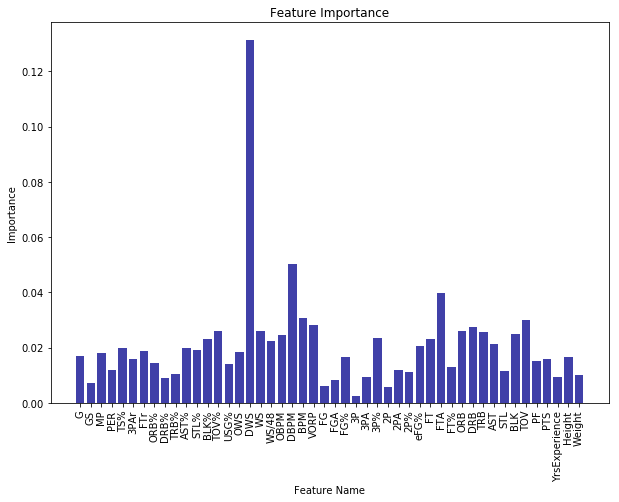

In [129]:
x_values = np.arange(len(feature_names))
plt.figure(figsize=(10, 7))

plt.title("Feature Importance")
plt.xlabel("Feature Name")
plt.ylabel("Importance")

plt.bar(x_values, rf.feature_importances_, facecolor="darkblue",
        alpha=0.75, tick_label=feature_names)
plt.xticks(rotation='vertical')
plt.savefig("DPOY_Features")
plt.show()

In [130]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.13116626629060202, 'DWS'),
 (0.050226319898740837, 'DBPM'),
 (0.039795305864784608, 'FTA'),
 (0.030849969620136496, 'BPM'),
 (0.029916018463713754, 'TOV'),
 (0.028040057497545595, 'VORP'),
 (0.027385744549446964, 'DRB'),
 (0.026058528252908456, 'TOV%'),
 (0.025957763151085608, 'WS'),
 (0.025859430538605673, 'ORB'),
 (0.025529839348820152, 'TRB'),
 (0.024780620659811722, 'BLK'),
 (0.024636432403483656, 'OBPM'),
 (0.023348926519516266, '3P%'),
 (0.023044900034684179, 'FT'),
 (0.022988957064487277, 'BLK%'),
 (0.022187701456487196, 'WS/48'),
 (0.021241306260771111, 'AST'),
 (0.020499264545745924, 'eFG%'),
 (0.019719593412178681, 'AST%'),
 (0.019705212430140517, 'TS%'),
 (0.019231744599203605, 'STL%'),
 (0.018615042410651629, 'FTr'),
 (0.018553336390492864, 'OWS'),
 (0.018013187842961145, 'MP'),
 (0.016795268001403355, 'G'),
 (0.016660989829457861, 'Height'),
 (0.016463154565117009, 'FG%'),
 (0.015907506095729055, '3PAr'),
 (0.015783392735840365, 'PTS'),
 (0.015031531947019901, 'PF'),
 

In [131]:
predictions = rf.predict(X_test)
predict_df = pd.DataFrame({"Prediction": predictions, "Actual": y_test})
wrong_predict_df = predict_df.loc[predict_df['Actual'] != predict_df['Prediction']]
wrong_predict_df

,Actual,Prediction
65,1,0


In [132]:
df.iloc[2053]

Year                        2011
Player             Dwight Howard
Pos                            C
Age                           25
Tm                           ORL
G                             78
GS                            78
MP                          2935
PER                         26.1
TS%                        0.616
3PAr                       0.007
FTr                        0.877
ORB%                        12.6
DRB%                        30.6
TRB%                        21.8
AST%                         6.8
STL%                         1.9
BLK%                         4.9
TOV%                        16.2
USG%                        27.2
OWS                          6.7
DWS                          7.7
WS                          14.4
WS/48                      0.235
OBPM                         0.9
DBPM                         3.9
BPM                          4.8
VORP                           5
FG                           619
FGA                         1044
FG%       

In [133]:
act_df_1 = predict_df.loc[predict_df['Actual'] == 1]
act_df_1

,Actual,Prediction
65,1,0
2053,1,1


In [134]:
predict_df_1 = predict_df.loc[predict_df['Prediction'] == 1]
predict_df_1

,Actual,Prediction
2053,1,1


In [135]:
predict_df.shape

(1195, 2)

# Combining DPOY, 6th Man, ROY, and MVP Data

In [136]:
season_stats = pd.read_csv('cleaned_data.csv')

In [137]:
dpoy_2016 = season_stats.loc[(season_stats['Year'] == 2016.0) & (season_stats['Player'] == 'Kawhi Leonard')]
dpoy_2015 = season_stats.loc[(season_stats['Year'] == 2015.0) & (season_stats['Player'] == 'Kawhi Leonard')]
dpoy_2014 = season_stats.loc[(season_stats['Year'] == 2014.0) & (season_stats['Player'] == 'Joakim Noah')]
dpoy_2013 = season_stats.loc[(season_stats['Year'] == 2013.0) & (season_stats['Player'] == 'Marc Gasol')]
dpoy_2012 = season_stats.loc[(season_stats['Year'] == 2012.0) & (season_stats['Player'] == 'Tyson Chandler')]
dpoy_2011 = season_stats.loc[(season_stats['Year'] == 2011.0) & (season_stats['Player'] == 'Dwight Howard')]
dpoy_2010 = season_stats.loc[(season_stats['Year'] == 2010.0) & (season_stats['Player'] == 'Dwight Howard')]
dpoy_2009 = season_stats.loc[(season_stats['Year'] == 2009.0) & (season_stats['Player'] == 'Dwight Howard')]
dpoy_2008 = season_stats.loc[(season_stats['Year'] == 2008.0) & (season_stats['Player'] == 'Kevin Garnett')]
dpoy_2007 = season_stats.loc[(season_stats['Year'] == 2007.0) & (season_stats['Player'] == 'Marcus Camby')]

dpoys = [dpoy_2007, dpoy_2008, dpoy_2009, dpoy_2010, dpoy_2011, dpoy_2012, dpoy_2013, dpoy_2014, dpoy_2015, dpoy_2016]

dpoys_df = pd.concat(dpoys)
#dpoys_df

In [138]:
sixman_2016 = season_stats.loc[(season_stats['Year'] == 2016.0) & (season_stats['Player'] == 'Jamal Crawford')]
sixman_2015 = season_stats.loc[(season_stats['Year'] == 2015.0) & (season_stats['Player'] == 'Lou Williams')]
sixman_2014 = season_stats.loc[(season_stats['Year'] == 2014.0) & (season_stats['Player'] == 'Jamal Crawford')]
sixman_2013 = season_stats.loc[(season_stats['Year'] == 2013.0) & (season_stats['Player'] == 'J.R. Smith')]
sixman_2012 = season_stats.loc[(season_stats['Year'] == 2012.0) & (season_stats['Player'] == 'James Harden')]
sixman_2011 = season_stats.loc[(season_stats['Year'] == 2011.0) & (season_stats['Player'] == 'Lamar Odom')]
sixman_2010 = season_stats.loc[(season_stats['Year'] == 2010.0) & (season_stats['Player'] == 'Jamal Crawford')]
sixman_2009 = season_stats.loc[(season_stats['Year'] == 2009.0) & (season_stats['Player'] == 'Jason Terry')]
sixman_2008 = season_stats.loc[(season_stats['Year'] == 2008.0) & (season_stats['Player'] == 'Manu Ginobili')]
sixman_2007 = season_stats.loc[(season_stats['Year'] == 2007.0) & (season_stats['Player'] == 'Leandro Barbosa')]

sixmen = [sixman_2007, sixman_2008, sixman_2009, sixman_2010, sixman_2011, sixman_2012, sixman_2013, sixman_2014, sixman_2015, sixman_2016]

sixmen_df = pd.concat(sixmen)

In [139]:
roy_2016 = season_stats.loc[(season_stats['Year'] == 2016.0) & (season_stats['Player'] == 'Karl-Anthony Towns')]
roy_2015 = season_stats.loc[(season_stats['Year'] == 2015.0) & (season_stats['Player'] == 'Andrew Wiggins')]
roy_2014 = season_stats.loc[(season_stats['Year'] == 2014.0) & (season_stats['Player'] == 'Michael Carter-Williams')]
roy_2013 = season_stats.loc[(season_stats['Year'] == 2013.0) & (season_stats['Player'] == 'Damian Lillard')]
roy_2012 = season_stats.loc[(season_stats['Year'] == 2012.0) & (season_stats['Player'] == 'Kyrie Irving')]
roy_2011 = season_stats.loc[(season_stats['Year'] == 2011.0) & (season_stats['Player'] == 'Blake Griffin')]
roy_2010 = season_stats.loc[(season_stats['Year'] == 2010.0) & (season_stats['Player'] == 'Tyreke Evans')]
roy_2009 = season_stats.loc[(season_stats['Year'] == 2009.0) & (season_stats['Player'] == 'Derrick Rose')]
roy_2008 = season_stats.loc[(season_stats['Year'] == 2008.0) & (season_stats['Player'] == 'Kevin Durant')]
roy_2007 = season_stats.loc[(season_stats['Year'] == 2007.0) & (season_stats['Player'] == 'Brandon Roy')]

rookies = [roy_2007, roy_2008, roy_2009, roy_2010, roy_2011, roy_2012, roy_2013, roy_2014, roy_2015, roy_2016]

rookies_df = pd.concat(rookies)

In [140]:
mvp_2016 = season_stats.loc[(season_stats['Year'] == 2016.0) & (season_stats['Player'] == 'Stephen Curry')]
mvp_2015 = season_stats.loc[(season_stats['Year'] == 2015.0) & (season_stats['Player'] == 'Stephen Curry')]
mvp_2014 = season_stats.loc[(season_stats['Year'] == 2014.0) & (season_stats['Player'] == 'Kevin Durant')]
mvp_2013 = season_stats.loc[(season_stats['Year'] == 2013.0) & (season_stats['Player'] == 'LeBron James')]
mvp_2012 = season_stats.loc[(season_stats['Year'] == 2012.0) & (season_stats['Player'] == 'LeBron James')]
mvp_2011 = season_stats.loc[(season_stats['Year'] == 2011.0) & (season_stats['Player'] == 'Derrick Rose')]
mvp_2010 = season_stats.loc[(season_stats['Year'] == 2010.0) & (season_stats['Player'] == 'LeBron James')]
mvp_2009 = season_stats.loc[(season_stats['Year'] == 2009.0) & (season_stats['Player'] == 'LeBron James')]
mvp_2008 = season_stats.loc[(season_stats['Year'] == 2008.0) & (season_stats['Player'] == 'Kobe Bryant')]
mvp_2007 = season_stats.loc[(season_stats['Year'] == 2007.0) & (season_stats['Player'] == 'Dirk Nowitzki')]

mvps = [mvp_2007, mvp_2008, mvp_2009, mvp_2010, mvp_2011, mvp_2012, mvp_2013, mvp_2014, mvp_2015, mvp_2016]

mvps_df = pd.concat(mvps)

In [141]:
df = season_stats

In [142]:
dpoys_index = dpoys_df.index.values.tolist()
dpoys_index

[77, 696, 1360, 1938, 2565, 2987, 3623, 4442, 4978, 5604]

In [143]:
sixmen_index = sixmen_df.index.values.tolist()
sixmen_index

[25, 708, 1626, 1809, 2703, 3107, 3920, 4157, 5256, 5391]

In [144]:
rookies_index = rookies_df.index.values.tolist()
rookies_index

[413, 667, 1565, 1850, 2529, 3156, 3763, 4136, 5249, 5805]

In [145]:
mvps_index = mvps_df.index.values.tolist()
mvps_index

[343, 598, 1383, 1978, 2761, 3164, 3701, 4205, 4766, 5398]

In [146]:
dpoy = []
for i in range(0, len(df)):
    if i in dpoys_index:
        value = 1
        dpoy.append(value)
    else:
        value = 0
        dpoy.append(value)

In [147]:
sixmen = []
for i in range(0, len(df)):
    if i in sixmen_index:
        value = 1
        sixmen.append(value)
    else:
        value = 0
        sixmen.append(value)

In [148]:
rookies = []
for i in range(0, len(df)):
    if i in rookies_index:
        value = 1
        rookies.append(value)
    else:
        value = 0
        rookies.append(value)

In [149]:
mvps = []
for i in range(0, len(df)):
    if i in mvps_index:
        value = 1
        mvps.append(value)
    else:
        value = 0
        mvps.append(value)

In [150]:
len(dpoy)

5860

In [151]:
len(sixmen)

5860

In [152]:
len(rookies)

5860

In [153]:
len(mvps)

5860

In [154]:
sum = 0
for i in range(0, len(dpoy)):
    sum = sum + dpoy[i]
print(sum)

10


In [155]:
sum = 0
for i in range(0, len(sixmen)):
    sum = sum + sixmen[i]
print(sum)

10


In [156]:
sum = 0
for i in range(0, len(rookies)):
    sum = sum + rookies[i]
print(sum)

10


In [157]:
sum = 0
for i in range(0, len(mvps)):
    sum = sum + mvps[i]
print(sum)

10


In [158]:
df['dpoy'] = dpoy
df['sixmen'] = sixmen
df['rookies'] = rookies
df['mvps'] = mvps

In [159]:
df.shape

(5860, 61)

In [160]:
df.keys()

Index(['Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2', 'OBPM', 'DBPM',
       'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'TrueSalary', 'YrsExperience', 'Height',
       'Weight', 'RoundedPosition', 'dpoy', 'sixmen', 'rookies', 'mvps'],
      dtype='object')

# Logistic Regression/Random Forests 6th Man

In [161]:
sixmen_df = df[np.isfinite(df['WS/48'])]
sixmen_df = sixmen_df[np.isfinite(sixmen_df['FG%'])]
sixmen_df = sixmen_df[np.isfinite(sixmen_df['YrsExperience'])]
sixmen_df = sixmen_df.drop("blanl", axis=1)
sixmen_df = sixmen_df.drop("blank2", axis=1)
sixmen_df = sixmen_df.dropna(axis=0, how='any')
sixmen_df = sixmen_df.reset_index(drop=True) #RESET INDEX
data = sixmen_df.drop("Pos", axis=1)
data = data.drop("Tm", axis=1)
data = data.drop("Player", axis=1)
data = data.drop("TrueSalary", axis=1)
data = data.drop("RoundedPosition", axis=1)
data = data.drop("Year", axis=1)
data = data.drop("Age", axis=1)
data = data.drop("sixmen", axis=1)
feature_names = data.columns
target = sixmen_df['sixmen']
#target_names = target.value_counts().keys().tolist()
#data.head()

In [162]:
data.shape

(4780, 51)

In [163]:
target.shape

(4780,)

In [164]:
#target = target.values.reshape(-1,1)

In [165]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=1, stratify=target)

In [166]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

/Users/owen/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/Users/owen/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [167]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

/Users/owen/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/Users/owen/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/owen/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [168]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [169]:
classifier.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [170]:
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Testing Data Score: 0.9974895397489539


In [171]:
predictions = classifier.predict(X_test_scaled)
predict_df = pd.DataFrame({"Prediction": predictions, "Actual": y_test})
wrong_predict_df = predict_df.loc[predict_df['Actual'] != predict_df['Prediction']]
wrong_predict_df

,Actual,Prediction
2162,1,0
19,1,0
2484,1,0


In [172]:
act_df_1 = predict_df.loc[predict_df['Actual'] == 1]
act_df_1

,Actual,Prediction
2162,1,0
19,1,0
2484,1,0


In [173]:
predict_df_1 = predict_df.loc[predict_df['Prediction'] == 1]
predict_df_1

,Actual,Prediction


In [174]:
from sklearn import tree

In [175]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [176]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.99748953974895394

In [177]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.99748953974895394

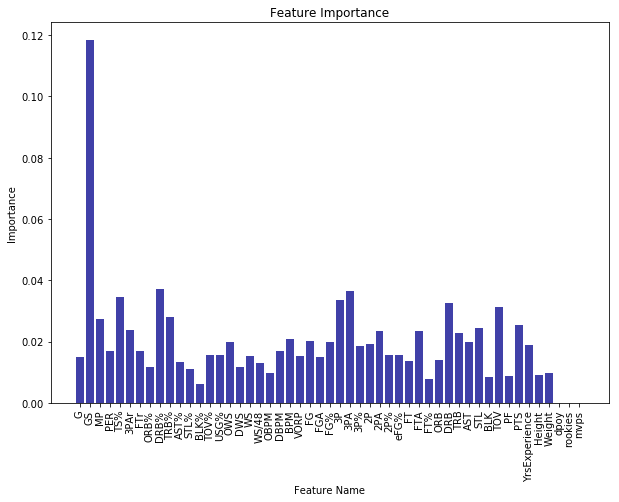

In [178]:
x_values = np.arange(len(feature_names))
plt.figure(figsize=(10, 7))

plt.title("Feature Importance")
plt.xlabel("Feature Name")
plt.ylabel("Importance")

plt.bar(x_values, rf.feature_importances_, facecolor="darkblue",
        alpha=0.75, tick_label=feature_names)
plt.xticks(rotation='vertical')
plt.savefig("6Man_Features")
plt.show()

In [179]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.11826056516215071, 'GS'),
 (0.037254410790666749, 'DRB%'),
 (0.036511057863840783, '3PA'),
 (0.034672500357570628, 'TS%'),
 (0.033389231220347211, '3P'),
 (0.032636324080420713, 'DRB'),
 (0.03129332986726787, 'TOV'),
 (0.027865495933529508, 'TRB%'),
 (0.027225934933921156, 'MP'),
 (0.025369684353941987, 'PTS'),
 (0.024394305516643518, 'STL'),
 (0.023650897684506629, '3PAr'),
 (0.023289621388381344, 'FTA'),
 (0.023272669713114355, '2PA'),
 (0.022682384918008294, 'TRB'),
 (0.020833732512762132, 'BPM'),
 (0.020303089968872857, 'FG'),
 (0.019831485429256886, 'FG%'),
 (0.01973265074656444, 'OWS'),
 (0.019721280632535979, 'AST'),
 (0.019045536302762466, '2P'),
 (0.018737610603310056, 'YrsExperience'),
 (0.018563596789038891, '3P%'),
 (0.017031950501753067, 'DBPM'),
 (0.017005387772478987, 'PER'),
 (0.016917866330308153, 'FTr'),
 (0.015759742562417123, 'TOV%'),
 (0.015706142599432264, 'eFG%'),
 (0.015488049159187518, '2P%'),
 (0.015479207091623896, 'USG%'),
 (0.01531019708224232, 'VORP'),

In [180]:
predictions = rf.predict(X_test)
predict_df = pd.DataFrame({"Prediction": predictions, "Actual": y_test})
wrong_predict_df = predict_df.loc[predict_df['Actual'] != predict_df['Prediction']]
wrong_predict_df

,Actual,Prediction
4369,1,0
19,1,0
3333,1,0


# Logistic Regression/Random Forests Rookie of the Year

In [181]:
rookies_df = df[np.isfinite(df['WS/48'])]
rookies_df = rookies_df[np.isfinite(rookies_df['FG%'])]
rookies_df = rookies_df[np.isfinite(rookies_df['YrsExperience'])]
rookies_df = rookies_df.drop("blanl", axis=1)
rookies_df = rookies_df.drop("blank2", axis=1)
rookies_df = rookies_df.dropna(axis=0, how='any')
rookies_df = rookies_df.reset_index(drop=True) #RESET INDEX
data = rookies_df.drop("Pos", axis=1)
data = data.drop("Tm", axis=1)
data = data.drop("Player", axis=1)
data = data.drop("TrueSalary", axis=1)
data = data.drop("RoundedPosition", axis=1)
data = data.drop("Year", axis=1)
data = data.drop("Age", axis=1)
data = data.drop("rookies", axis=1)
feature_names = data.columns
target = sixmen_df['rookies']
#target_names = target.value_counts().keys().tolist()
#data.head()

In [182]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=1, stratify=target)

In [183]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

/Users/owen/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/Users/owen/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [184]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

/Users/owen/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/Users/owen/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/owen/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [185]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [186]:
classifier.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [187]:
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Testing Data Score: 0.9974895397489539


In [188]:
from sklearn import tree

In [189]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42, stratify=target)

In [190]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.99748953974895394

In [191]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.99832635983263596

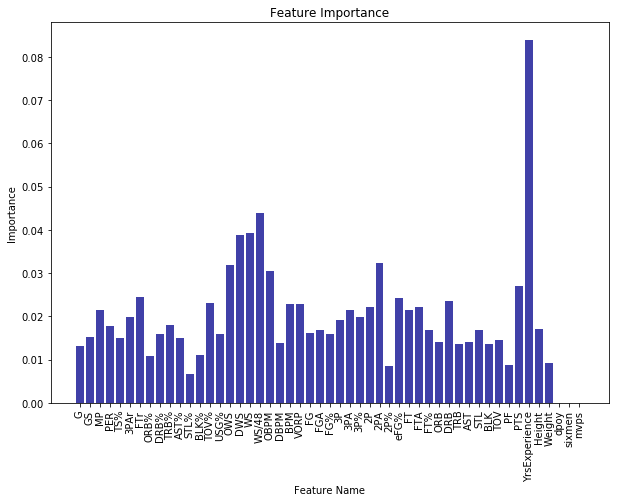

In [192]:
x_values = np.arange(len(feature_names))
plt.figure(figsize=(10, 7))

plt.title("Feature Importance")
plt.xlabel("Feature Name")
plt.ylabel("Importance")

plt.bar(x_values, rf.feature_importances_, facecolor="darkblue",
        alpha=0.75, tick_label=feature_names)
plt.xticks(rotation='vertical')
plt.savefig("ROY_Features")
plt.show()

In [193]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.083788594747960521, 'YrsExperience'),
 (0.043918785934059248, 'WS/48'),
 (0.039169603972168766, 'WS'),
 (0.038888079131754842, 'DWS'),
 (0.032430083507732708, '2PA'),
 (0.031776923727027021, 'OWS'),
 (0.030489822048948609, 'OBPM'),
 (0.026969691985519181, 'PTS'),
 (0.024428834656098748, 'FTr'),
 (0.024295142233821908, 'eFG%'),
 (0.023431062952203287, 'DRB'),
 (0.023003602797814618, 'TOV%'),
 (0.022873878083925655, 'BPM'),
 (0.022755814460825245, 'VORP'),
 (0.022164797231409458, '2P'),
 (0.022036689689900343, 'FTA'),
 (0.021515007100624532, 'MP'),
 (0.021374065006627481, '3PA'),
 (0.021354026285456826, 'FT'),
 (0.01986972636780901, '3PAr'),
 (0.01977161147651706, '3P%'),
 (0.01913484009048633, '3P'),
 (0.017999378505040135, 'TRB%'),
 (0.017693363584107356, 'PER'),
 (0.017162506130542803, 'Height'),
 (0.016851988284381517, 'FGA'),
 (0.016778485016822348, 'FT%'),
 (0.016776185882095576, 'STL'),
 (0.016240738947467602, 'FG'),
 (0.01594881037112085, 'DRB%'),
 (0.015940562019069765, 'USG

In [194]:
predictions = rf.predict(X_test)
predict_df = pd.DataFrame({"Prediction": predictions, "Actual": y_test})
wrong_predict_df = predict_df.loc[predict_df['Actual'] != predict_df['Prediction']]
wrong_predict_df

,Actual,Prediction
2020,1,0
1240,1,0


In [195]:
act_df_1 = predict_df.loc[predict_df['Actual'] == 1]
act_df_1

,Actual,Prediction
2020,1,0
1240,1,0


# Logistic Regression/Random Forests MVP

In [196]:
mvp_df = df[np.isfinite(df['WS/48'])]
mvp_df = mvp_df[np.isfinite(mvp_df['FG%'])]
mvp_df = mvp_df[np.isfinite(mvp_df['YrsExperience'])]
mvp_df = mvp_df.drop("blanl", axis=1)
mvp_df = mvp_df.drop("blank2", axis=1)
mvp_df = mvp_df.dropna(axis=0, how='any')
mvp_df = mvp_df.reset_index(drop=True) #RESET INDEX
data = mvp_df.drop("Pos", axis=1)
data = data.drop("Tm", axis=1)
data = data.drop("Player", axis=1)
data = data.drop("TrueSalary", axis=1)
data = data.drop("RoundedPosition", axis=1)
data = data.drop("Year", axis=1)
data = data.drop("Age", axis=1)
data = data.drop("mvps", axis=1)
feature_names = data.columns
target = sixmen_df['mvps']

In [197]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=1, stratify=target)

In [198]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

/Users/owen/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/Users/owen/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [199]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

/Users/owen/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/Users/owen/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/owen/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [200]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [201]:
classifier.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [202]:
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Testing Data Score: 0.9974895397489539


In [203]:
from sklearn import tree

In [204]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42, stratify=target)

In [205]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.99832635983263596

In [206]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.99916317991631798

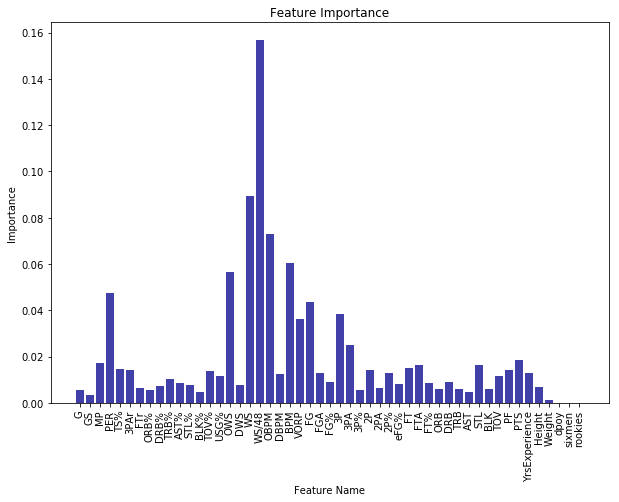

In [207]:
x_values = np.arange(len(feature_names))
plt.figure(figsize=(10, 7))

plt.title("Feature Importance")
plt.xlabel("Feature Name")
plt.ylabel("Importance")

plt.bar(x_values, rf.feature_importances_, facecolor="darkblue",
        alpha=0.75, tick_label=feature_names)
plt.xticks(rotation='vertical')
plt.savefig("MVP_Features")
plt.show()

In [208]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.15660173264926672, 'WS/48'),
 (0.089444669437450261, 'WS'),
 (0.073071697395315632, 'OBPM'),
 (0.060606950934968963, 'BPM'),
 (0.056719186112048403, 'OWS'),
 (0.047567528157544094, 'PER'),
 (0.043732160650124613, 'FG'),
 (0.038412964994830545, '3P'),
 (0.03612303485897099, 'VORP'),
 (0.024853929162075489, '3PA'),
 (0.018397596652684471, 'PTS'),
 (0.01733640160193968, 'MP'),
 (0.016265581994614444, 'FTA'),
 (0.016246156115112223, 'STL'),
 (0.015090427197062131, 'FT'),
 (0.014656080341525759, 'TS%'),
 (0.014375328300968217, '3PAr'),
 (0.014094897178475407, '2P'),
 (0.014028043274048997, 'PF'),
 (0.013837236635349184, 'TOV%'),
 (0.012753429819539275, '2P%'),
 (0.012725174195559866, 'YrsExperience'),
 (0.012680075981182998, 'FGA'),
 (0.012644021328484351, 'DBPM'),
 (0.011696339134658755, 'USG%'),
 (0.011455487434368283, 'TOV'),
 (0.010427984197804281, 'TRB%'),
 (0.0091266226350814154, 'DRB'),
 (0.009111842294355299, 'FG%'),
 (0.0085405576145099055, 'AST%'),
 (0.0084686035641375387, 'FT

In [209]:
predictions = rf.predict(X_test)
predict_df = pd.DataFrame({"Prediction": predictions, "Actual": y_test})
wrong_predict_df = predict_df.loc[predict_df['Actual'] != predict_df['Prediction']]
wrong_predict_df

,Actual,Prediction
2206,1,0


In [210]:
act_df_1 = predict_df.loc[predict_df['Actual'] == 1]
act_df_1

,Actual,Prediction
2206,1,0
1095,1,1


In [211]:
mvp_df.iloc[2206]

Year                       2011
Player             Derrick Rose
Pos                          PG
Age                          22
Tm                          CHI
G                            81
GS                           81
MP                         3026
PER                        23.5
TS%                        0.55
3PAr                      0.241
FTr                       0.348
ORB%                        3.2
DRB%                        9.4
TRB%                        6.4
AST%                       38.7
STL%                        1.5
BLK%                        1.3
TOV%                       13.1
USG%                       32.2
OWS                         8.3
DWS                         4.8
WS                         13.1
WS/48                     0.208
OBPM                        5.8
DBPM                        0.1
BPM                         5.9
VORP                          6
FG                          711
FGA                        1597
FG%                       0.445
3P      